## Исследование данных о российском кинопрокате



### Вступление

Перед нами заказ от Министерства культуры РФ: данные о рынке российского проката за последние годы.
Два файла:
- данные о прокатных удостоверениях.
- данные о прокате в российских кинотеатрах.

Для начала данные надо объеденить в одну таблицу и проводить операции уже над ней.

- Объединим таблицы.
- Проверим и преобразуем типы там, где необходимо.
- Заполним пропуски, там, где это надо.
- Обработаем дупликаты, выявим явные и неявные.
- Проверим аномалии в данных
- Добавим новые столбцы, чтобы сделать больше выводов и детальнее проанализировать ситуацию.
- Посмотрим, сколько фильмов прокатывалось в каждом году.
- Выделим категории фильмов в зависимости от сборов.
- Посмотрим, какая возрастная категория самая прибыльная.
- Посмотрим, какой рейтинг у большинства фильмов.
- Узнаем, сколько всего прибыльных картин было выпущено за все время.
- Выявим статистку провальных и прибыльных фильмов с гос.поддержкой и без неё.
- Найдём количество прибыльных кинолент и их динамику по годам.
- Узнаем, какие режиссёры и студии сняли успешные фильмы, какие - провальные.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce') # переведём в тип float

In [7]:
#shows['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce') # переведём в тип float

In [8]:
np.dtype(movies['puNumber'])

dtype('float64')

In [9]:
np.dtype(shows['puNumber'])

dtype('int64')

Проверяем типы. Тип в двух таблицах одинаковый.

In [10]:
data = shows.merge(movies, on='puNumber', how='outer') # объединяем таблицы по столбцу 'puNumber'

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7485 non-null   float64
 1   box_office             3158 non-null   float64
 2   title                  7486 non-null   object 
 3   show_start_date        7486 non-null   object 
 4   type                   7486 non-null   object 
 5   film_studio            7468 non-null   object 
 6   production_country     7484 non-null   object 
 7   director               7477 non-null   object 
 8   producer               6918 non-null   object 
 9   age_restriction        7486 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

In [12]:
display(data.head())

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113.00,2450.00,Тайна перевала Дятлова,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика"
1,111000115.00,61040.00,Небесный верблюд,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.00,34000000.00,49280496.00,Министерство культуры,6.7,"детский,семейный"
2,111000116.00,153030013.40,"Статус: ""Свободен""",2016-01-13T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.00,20000000.00,78686500.00,Фонд кино,5.8,"комедия,мелодрама"
3,111000117.00,12260956.00,После тебя,2017-01-10T12:00:00.000Z,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.00,20000000.00,45483233.00,"Министерство культуры, Фонд кино",6.7,драма
4,111000118.00,163684057.79,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23T12:00:00.000Z,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.2,комедия


#### Промежуточный итог
Уже на этапе объединения мы столкнулись с проблемой: в столбце с номерами прокатных удостоверений (puNumber) данные разных типов, что привело к ошибке при попытке задать тип колонке. У одного фильма было написано "нет". Мы изменили его на NaN. После этого объединение произошло.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
count = 0
rats = []
for i in data['ratings']:
    if '%' in str(i):
        count += 1
        rats.append(i)
print(count)
print(rats)

29
['99%', '91%', '98%', '94%', '79%', '89%', '90%', '28%', '83%', '64%', '94%', '88%', '88%', '83%', '19%', '99%', '97%', '99%', '62%', '79%', '91%', '97%', '97%', '88%', '83%', '94%', '91%', '98%', '99%']


In [14]:
data.query('"28%" in ratings')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
798,114000212.00,1740.00,От винта!,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия"


In [15]:
data['ratings'] = pd.to_numeric(data['ratings'].str.strip('%'))

In [16]:
data['ratings'] = data['ratings'].where(~(data['ratings']>10), other = (data['ratings']/10))

In [17]:
data['ratings'].unique()

array([5.1, 6.7, 5.8, 3.2, 5.3, 3. , 5.4, 6.1, 5.9, 4.7, 6.6, 6. , 7.2,
       7.1, 4.5, 7.3, 3.3, 6.8, 5.7, nan, 4.9, 4.3, 2.8, 6.2, 3.9, 1.9,
       4.8, 7. , 7.5, 6.4, 9.9, 4.2, 6.5, 5.2, 5. , 3.1, 6.3, 5.6, 3.7,
       2.6, 8. , 6.9, 7.8, 4.1, 9.1, 2.9, 7.4, 3.4, 4.6, 7.9, 8.5, 8.1,
       9.8, 7.6, 9.4, 1.4, 3.8, 7.7, 1.5, 2.7, 4.4, 4. , 2.5, 8.3, 8.8,
       1.2, 8.4, 5.5, 8.2, 8.7, 1.6, 9.2, 1. , 8.9, 9. , 2.1, 2.4, 3.5,
       8.6, 3.6, 9.7, 1.1, 1.3, 1.8, 1.7])

In [18]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   puNumber               7485 non-null   float64            
 1   box_office             3158 non-null   float64            
 2   title                  7486 non-null   object             
 3   show_start_date        7486 non-null   datetime64[ns, UTC]
 4   type                   7486 non-null   object             
 5   film_studio            7468 non-null   object             
 6   production_country     7484 non-null   object             
 7   director               7477 non-null   object             
 8   producer               6918 non-null   object             
 9   age_restriction        7486 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

Неправильным типом данных страдают не так много столбцов: 'ratings' и 'show_start_date'. Первое следует преобразовать во float, заменив встречающиеся проценты на десятичные числа (92% - 9.2). А 'show_start_date' вместо типа object стал datetime64. Остальные колонки имеют строковые значения, поэтому удовлетворяют типу object.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [20]:
data.isna().sum()

puNumber                    1
box_office               4328
title                       0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [21]:
data.describe()

,puNumber,box_office,refundable_support,nonrefundable_support,budget,ratings
count,7485.00,3158.00,332.00,332.00,332.00,6519.00
mean,135196587.56,76478696.16,11864457.83,48980988.89,127229716.68,6.49
std,38352919.34,240353122.82,24916555.26,59980117.92,188588333.12,1.11
min,1811096.00,0.00,0.00,0.00,0.00,1.00
25%,112025118.00,86239.00,0.00,25000000.00,42000000.00,5.90
50%,121015510.00,2327987.55,0.00,30000000.00,68649916.00,6.60
75%,124003314.00,23979671.02,15000000.00,40375000.00,141985319.50,7.20
max,231001111.00,3073568690.79,180000000.00,400000000.00,2305074303.00,9.90


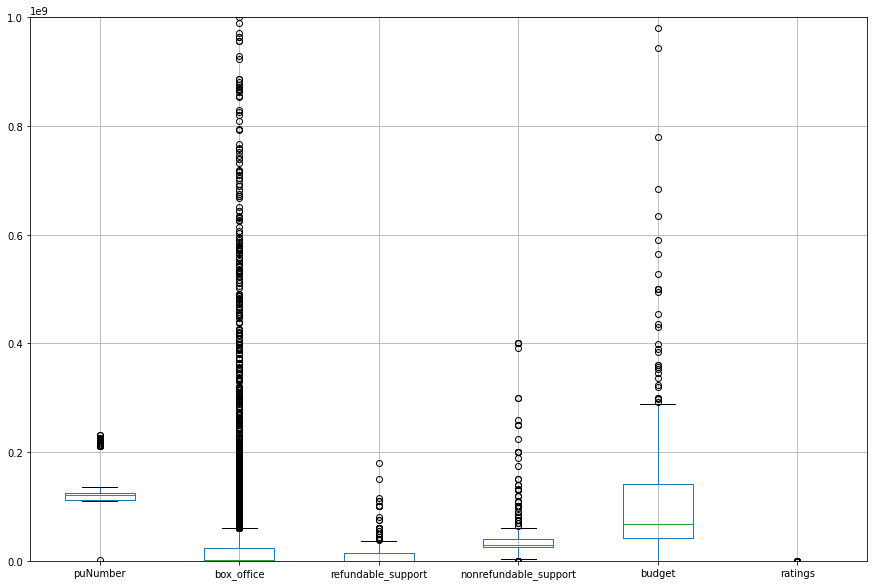

In [22]:
data.boxplot(figsize=(15, 10))
plt.ylim(-100000, 1000000000);

Прежде чем заполнять пропуски выведем диаграму размаха и таблицу, демонстрирующую нам описательную статистику. Диаграмма показывает, что выбросов очень много, особенно у столбца с кассовыми сборами, что логично. Есть немного выбросов у колонок с бюджетом и гос.поддержкой. Столбец с рейтингами не имеет большого разброса, так что пропуски могут быть заменены медианым значениями - рейтинг, как критерий определения фильма достаточно слабоват (фильм с плохим рейтингом может собрать, а с хорошим - провалиться, также рейтинг может быть накручен), поэтому замена пропусков медианой имеет место. Остальные колонки, которые оперируют значениями, связанными с бюджетом заполнять медианой или средним будет неправильно, бюджет или сборы могут сильно отличаться от них.

In [23]:
for column in data.columns:
    proportion = (data[column].isna().sum() / data.shape[0]) * 100
    print(f'Доля пропусков в {column} - {round(proportion)}%')

Доля пропусков в puNumber - 0%
Доля пропусков в box_office - 58%
Доля пропусков в title - 0%
Доля пропусков в show_start_date - 0%
Доля пропусков в type - 0%
Доля пропусков в film_studio - 0%
Доля пропусков в production_country - 0%
Доля пропусков в director - 0%
Доля пропусков в producer - 8%
Доля пропусков в age_restriction - 0%
Доля пропусков в refundable_support - 96%
Доля пропусков в nonrefundable_support - 96%
Доля пропусков в budget - 96%
Доля пропусков в financing_source - 96%
Доля пропусков в ratings - 13%
Доля пропусков в genres - 13%


In [24]:
data.isna().mean().to_frame().style.format("{:.2%}")

,0
puNumber,0.01%
box_office,57.81%
title,0.00%
show_start_date,0.00%
type,0.00%
film_studio,0.24%
production_country,0.03%
director,0.12%
producer,7.59%
age_restriction,0.00%


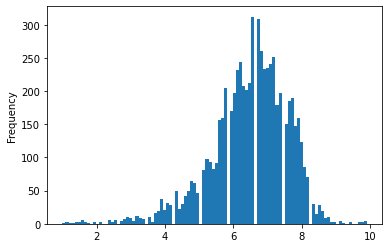

In [25]:
data['ratings'].plot(kind='hist', bins=100);

In [26]:
data['ratings'] = data['ratings'].fillna(data['ratings'].median()) # заполняем рейтинги медианой
data['ratings'].isna().sum()

0

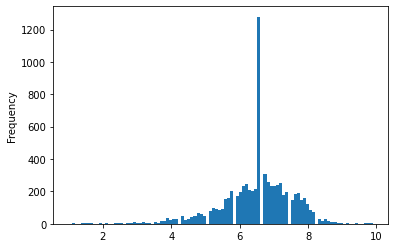

In [27]:
data['ratings'].plot(kind='hist', bins=100);

In [28]:
data[data['production_country'].isnull() == True]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
64,111001216.00,194527.00,"Детский юмористический киножурнал ""Ералаш. Ну ...",2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия"
5754,214000410.00,NaN,Мульт личности. Выпуск 5,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия"


In [29]:
data.loc[data['production_country'].isnull() == True, 'production_country'].fillna('Россия')

64      Россия
5754    Россия
Name: production_country, dtype: object

В столбце со странами есть два пропуска. Сами фильмы (вернее сериалы) из России, так что на месте пропусков в 'production_country' поставим Россию.

In [30]:
print(data['director'].isna().sum() / data['director'].count())
print(data['producer'].isna().sum() / data['producer'].count())
print(data['genres'].isna().sum() / data['genres'].count())

0.0012036913200481477
0.08210465452442903
0.1499231950844854


In [31]:
data[data['director'].isnull() == True]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3040,126003512.00,44350.00,"Три звезды. Концерт в Waldbuhne Theater, Берли...",2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.60,NaN
4490,126003413.00,NaN,Помпеи. Британский музей,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.60,NaN
5225,217027010.00,NaN,Зур концерт (Большой концерт).,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.60,NaN
5414,217017310.00,NaN,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.60,NaN
5632,217020610.00,NaN,Изге Вэли (Святой Валентин),2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.60,NaN
5732,126001710.00,NaN,Bon Jovi. The Circle Tour,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка"
5754,214000410.00,NaN,Мульт личности. Выпуск 5,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия"
6189,126001111.00,NaN,Георг Фридрих Гендель. Мессия. Оратория. Корол...,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.60,NaN
6206,126002711.00,NaN,Питер Гэбриэл и New Blood Orchestra 3D,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка"


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [32]:
for column in data.columns:
    print(f'Дупликатов в {column} - {data[column].duplicated().sum()}')

Дупликатов в puNumber - 2
Дупликатов в box_office - 4547
Дупликатов в title - 714
Дупликатов в show_start_date - 5521
Дупликатов в type - 7478
Дупликатов в film_studio - 1995
Дупликатов в production_country - 6535
Дупликатов в director - 2674
Дупликатов в producer - 2136
Дупликатов в age_restriction - 7481
Дупликатов в refundable_support - 7451
Дупликатов в nonrefundable_support - 7410
Дупликатов в budget - 7195
Дупликатов в financing_source - 7482
Дупликатов в ratings - 7402
Дупликатов в genres - 6743


In [33]:
data[data['title'].duplicated() == True]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1713,121016014.00,1260.00,Большая афера,2014-07-29 12:00:00+00:00,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,драма"
2106,121023513.00,2820.00,Лимб,2013-09-09 12:00:00+00:00,Художественный,"Уалд Банч, Куперхарт Интертейнмент, Гувернеман...",Канада - Франция,Винченцо Натали,Марк Ду Понтавиче,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"ужасы,фэнтези,триллер"
2276,121026516.00,745510.00,Гарри Поттер и Дары Смерти - Часть 1/По роману...,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"фэнтези,драма,детектив"
2281,121026616.00,1017220.00,Гарри Поттер и Дары Смерти - Часть 2 /По роман...,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, Мувинг Пикчер Компани, Уорнер Бр...",США - Великобритания,Дэвид Йетс,"Дэвид Баррон, Дэвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"фэнтези,драма,детектив"
2575,121035919.00,175003.51,Зверь,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,121030019.00,NaN,Безумный Макс: Дорога ярости,2019-12-06 12:00:00+00:00,Художественный,Уорнер Бразерс Пикчерс,"Австралия, США",Джордж Миллер,"Джордж Миллер, Даг Митчелл, Брюс Берман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.80,"боевик,фантастика,приключения"
7420,111019319.00,NaN,Невиновен,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал"
7444,121035119.00,NaN,"Отель ""Гранд Будапешт""",2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив"
7462,121036919.00,NaN,В тихом омуте,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив"


In [34]:
data[data['title'] == 'Невиновен']

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
6819,111013218.00,NaN,Невиновен,2018-08-30 12:00:00+00:00,Художественный,"ИП Емкужев А.С., ИП Хуажева А.Ш.",Россия,А.Емкужев,"А.Хуажева, А.Емкужев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал"
7420,111019319.00,NaN,Невиновен,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал"


В разных колонках дупликатов мало там, где должно быть мало и много там, где их должно быть много:
<br>
- В "puNumber"  мало дупликатов, так как каждый фильм и каждая серия сериала имеет свой уникальный номер прокатного удостоверения.
- В "box_office" есть вероятность, что фильмы собирали одиноково в прокате.
- Интересная ситуация в 'title'. Если изучить таблицу, то можно найти фильмы, которые прокатывались несколько раз в кинотеатрах. Либо зарубежные фильмы локализуют, и выходит российский фильм с таким же названием. Однако есть и аномалии, например фильм "Невиновен" А.Емкужева снимался два раза (на Кинопоиске у режиссёра один фильм).
- Типы, жанры фильмов, режиссёры, продюссеры, источники финансирования, возрастные категории, страны и студии производители, рейтинг - это всё категориальные переменные, стоящие в ограниченном количестве, так что большое количество дупликатов понятно.
- Бюджет на фильмы также выделяется фиксированный, следовательно большое количество дупликатов. То же самое с объёмом на возвратной и невозвратной основе.

In [35]:
data.shape[0] - data.duplicated().count()

0

Полных дупликатов в таблице не найдено. То есть может быть фильм с одинаковым названием, и разным прокатным номером, если вспомнить, что дупликатов в puNumber всего 2.

In [36]:
(
    data
 .pivot_table(index='title', values = 'puNumber', aggfunc='count')
 .sort_values(by='puNumber', ascending=False)
 .head(20)
)

,puNumber
title,
День святого Валентина_,5
"Там, где живут чудовища",4
Рапунцель: Запутанная история,4
Дом грёз,4
Белоснежка и охотник,4
Белая мгла /По комиксу Грега Рукка и Стива Либера/,4
Безумцы,4
Начало_,4
Не брать живым /По книге Раджива Чандрасекарана/,4


In [37]:
(
    data
 .pivot_table(index='title', values = 'box_office', aggfunc='count')
 .sort_values(by='box_office', ascending=False)
 .head(20)
)

,box_office
title,
Снупи и мелочь пузатая в кино,2
Монстры на острове,2
Зверь,2
Багровый пик,2
"Здравствуй, папа, Новый год",2
Образцовый самец 2,2
Смурфики,2
Она,2
Арктика 3D,2


In [38]:
(
    data
 .pivot_table(index='title', values = 'director', aggfunc='count')
 .sort_values(by='director', ascending=False)
 .head(20)
)

,director
title,
День святого Валентина_,5
Жена путешественника во времени,4
Дитя тьмы,4
Дорога /По новелле Кормака МкКарфи/,4
Белоснежка и охотник,4
Рапунцель: Запутанная история,4
Белая мгла /По комиксу Грега Рукка и Стива Либера/,4
Безумцы,4
Лузеры,4


In [39]:
data[data['title'] == 'Рапунцель: Запутанная история']

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2728,124001910.00,17055.00,Рапунцель: Запутанная история,2010-11-23 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези"
3466,224013614.00,NaN,Рапунцель: Запутанная история,2014-10-10 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези"
3467,224026712.00,NaN,Рапунцель: Запутанная история,2012-10-23 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези"
6048,224028210.00,NaN,Рапунцель: Запутанная история,2010-12-31 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези"


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [40]:
data['producer'].unique()

array(['А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм', 'И.Плиско',
       'С.Ливнев, Д.Козловский, С.Бобза', ..., 'ВГИК',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [41]:
data['film_studio'].unique().tolist()

['ООО "Нон-Стоп Продакшн"',
 'ООО Продюсерский центр "Всё хорошо"',
 'ООО "Кинодом"',
 'Компания Production Value WorldWide (ООО "ПРОДАКШН ВЭЛЬЮ ВОРЛД ВАЙД), ЧУК "КИНОКОМПАНИЯ СЕРГЕЯ БЕЗРУКОВА" ',
 'ООО "Комеди Клаб продакшн"',
 'ООО "Чайка Синема"',
 'ООО "Территория Кино"',
 'ООО "Каргофильм"',
 'ООО Киностудия "Сагиттариус - Д"',
 'ООО "ЕМ Продакшн"',
 'ООО "Компания "АТК-Студио"',
 'ООО "Кинокомпания "СТВ"',
 'ООО "АВК"',
 'ООО "Продюсерская фирма Игоря Толстунова", ООО Кинокомпания "ТВ-МУВИ"',
 'Культурный фонд " Кино-телекомпания " Православная энциклопедия "',
 'ООО "Продюсерская фирма Игоря Толстунова"',
 'ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 'ООО Кинокомпания "Лунапарк"',
 ' ООО "Форс Медиа"',
 'ФГУП "Киноконцерн "Мосфильм"',
 'ООО "Комедия Фильм"',
 'ООО "Творческое объединение "Кинокомпания "Андреевский флаг", ООО "Группа компаний "Андреевский флаг"',
 'ООО "Продюсерский 

In [42]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Возможно, проблема в том, что в некоторых строках встречаются компиляции из ранее встречающихся значений. Также проблема возникает в отступах, часто встречающихся в категориальных значениях. Очистим таблицу от них. Ещё одна гипотеза - могут встречаться названия, которые отличаются, и при группировке будут в отдельных строках.

In [43]:
data['show_start_date'].dtype

datetime64[ns, UTC]

In [44]:
for column in data.columns:              
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip() # отчистим от отступов все колонки со значениями типа object

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [45]:
data.pivot_table(index='budget', values=['refundable_support', 'nonrefundable_support'])

,nonrefundable_support,refundable_support
budget,,
0.00,65174674.41,16705882.35
14462464.00,4700000.00,0.00
15010000.00,10000000.00,0.00
18166418.00,8000000.00,0.00
18706080.00,11520000.00,0.00
...,...,...
779941965.00,60000000.00,0.00
944000000.00,400000000.00,100000000.00
980000000.00,400000000.00,100000000.00


In [46]:
data[data['budget'] < data['nonrefundable_support'] + data['refundable_support']].count() # сумма общей поддержки не должна превышать бюджет

puNumber                 17
box_office               17
title                    17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  17
genres                   16
dtype: int64

In [47]:
data[data['budget'] > data['nonrefundable_support'] + data['refundable_support']].count() # сумма общей поддержки не должна превышать бюджет

puNumber                 315
box_office               301
title                    315
show_start_date          315
type                     315
film_studio              315
production_country       315
director                 315
producer                 313
age_restriction          315
refundable_support       315
nonrefundable_support    315
budget                   315
financing_source         315
ratings                  315
genres                   300
dtype: int64

Столбец "budget" включает в себя полный объём государственной поддержки. Получается, общий бюджет фильма не должен превышать сумму возвратных и невозвратных средств. Однако в таблице встречаются фильмы, у которых бюджет равен нулю, но есть объём возвратных средств. Встречаются также и ленты с бюджетом больше поддержки. Также есть фильмы, у которых нет объёма невозвратных средств, а общий бюджет превышает объем возвратных - куда делась остальная часть бюджета? И ключевой вопрос: если бюджет включает в себя полную поддержку, но поддержка меньше бюджета - откуда взялись ещё средства?

- Проверим puNumber

In [48]:
np.dtype(data['puNumber'])

dtype('float64')

In [49]:
len(data['puNumber'].unique())

7484

In [50]:
int(data['puNumber'].astype(str).str.len().median() + 1)

12

In [51]:
int(data['puNumber'].astype(str).str.len().min() + 1)

4

In [52]:
finding = re.findall(r'\d+.\d+', str(data['puNumber'].tolist()))
print(len(finding))

7485


Аномальных значений не обнаружено

- Проверим box_office

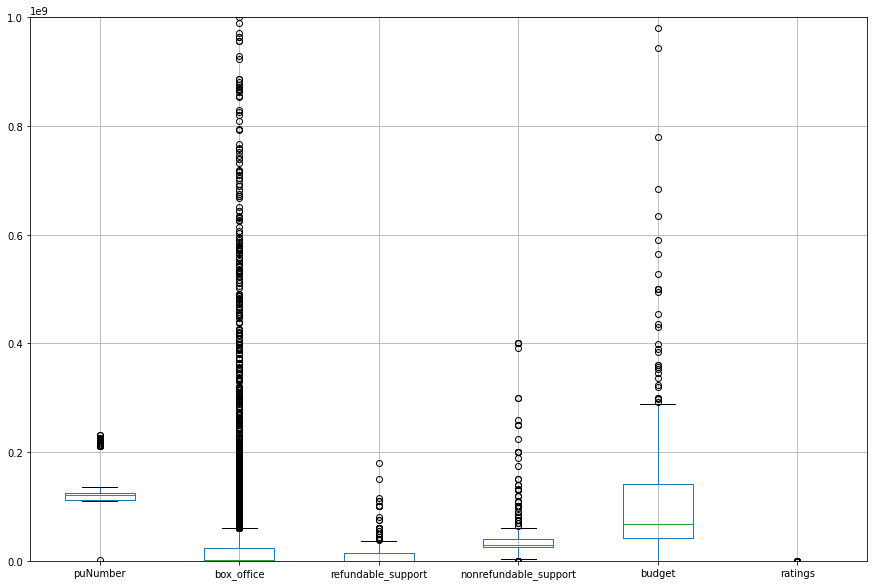

In [53]:
data.boxplot(figsize=(15, 10))
plt.ylim(-100000, 1000000000);

In [54]:
data[data['box_office'] < 10000].head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113.00,2450.00,Тайна перевала Дятлова,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.10,"ужасы,фантастика"
6,111000212.00,200.00,Ржевский против Наполеона,2012-01-12 12:00:00+00:00,Художественный,"ООО ""Территория Кино""",Россия,М.Бальчунас,"ООО ""Квартал Леополис""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.00,комедия
8,111000313.00,710.00,ОХОТА НА ПРИНЦЕССУ. Часть 2,2013-01-31 12:00:00+00:00,Художественный,"ООО Киностудия ""Сагиттариус - Д""",Россия,С.Дружинина,С.Дружинина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"драма,история"
14,111000412.00,1920.00,Орда,2012-01-26 12:00:00+00:00,Художественный,"Культурный фонд "" Кино-телекомпания "" Правосла...",Россия,А.Прошкин,Н.Гостюшина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,история
15,111000413.00,7104.00,Метро_,2013-02-04 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,А.Мегердичев,И.Толстунов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,"триллер,драма"


В стобце с кассовыми сборами обнаружились аномалии. Сборы 400, 360, 200 рублей - это очень странно. Ошибка могла возникнуть вследствие неправильного считывания информации или неправильно внесённых данных. К сожалению, мы не можем предположить и даже попытаться предугодать, какое число должно быть на месте аномалии. 

Также диаграмма размаха показала, что в этом столбце находится большое количество выбросов, ведь у сборов нет фиксированного порога.

- Проверим ratings

In [55]:
data['ratings'].unique()

array([5.1, 6.7, 5.8, 3.2, 5.3, 3. , 5.4, 6.1, 5.9, 4.7, 6.6, 6. , 7.2,
       7.1, 4.5, 7.3, 3.3, 6.8, 5.7, 4.9, 4.3, 2.8, 6.2, 3.9, 1.9, 4.8,
       7. , 7.5, 6.4, 9.9, 4.2, 6.5, 5.2, 5. , 3.1, 6.3, 5.6, 3.7, 2.6,
       8. , 6.9, 7.8, 4.1, 9.1, 2.9, 7.4, 3.4, 4.6, 7.9, 8.5, 8.1, 9.8,
       7.6, 9.4, 1.4, 3.8, 7.7, 1.5, 2.7, 4.4, 4. , 2.5, 8.3, 8.8, 1.2,
       8.4, 5.5, 8.2, 8.7, 1.6, 9.2, 1. , 8.9, 9. , 2.1, 2.4, 3.5, 8.6,
       3.6, 9.7, 1.1, 1.3, 1.8, 1.7])

В столбце аномальных значений не обнаружено.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [56]:
data['show_start_date'].dt.date

0       2013-01-17
1       2015-01-14
2       2016-01-13
3       2017-01-10
4       2018-01-23
           ...    
7481    2019-12-23
7482    2019-12-24
7483    2019-12-28
7484    2019-12-30
7485    2019-12-30
Name: show_start_date, Length: 7486, dtype: object

In [57]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [58]:
def director_year(row):
    return re.split(',|-',str(row))[0]

In [59]:
data['main_director'] = data['director'].apply(director_year) 
data['main_genre'] = data['genres'].apply(director_year)

In [60]:
data['main_country'] = data['production_country'].apply(director_year) # добавим столбец с главной страной для будущего анализа

In [61]:
data

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year,main_director,main_genre,main_country
0,111000113.00,2450.00,Тайна перевала Дятлова,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.10,"ужасы,фантастика",2013,Ренни Харлин,ужасы,Россия
1,111000115.00,61040.00,Небесный верблюд,2015-01-14 12:00:00+00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.00,34000000.00,49280496.00,Министерство культуры,6.70,"детский,семейный",2015,Ю.Фетинг,детский,Россия
2,111000116.00,153030013.40,"Статус: ""Свободен""",2016-01-13 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.00,20000000.00,78686500.00,Фонд кино,5.80,"комедия,мелодрама",2016,П.Руминов,комедия,Россия
3,111000117.00,12260956.00,После тебя,2017-01-10 12:00:00+00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.00,20000000.00,45483233.00,"Министерство культуры, Фонд кино",6.70,драма,2017,А.Матисон,драма,Россия
4,111000118.00,163684057.79,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00+00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.20,комедия,2018,З.Болотаев,комедия,Россия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,126008019.00,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.60,NaN,2019,Фил Грабски,nan,Великобритания
7482,121037819.00,NaN,Звериная ярость,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",2019,Ник Пауэлл,боевик,США
7483,124010819.00,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.60,NaN,2019,Чарльз Е.Бастьен,nan,США
7484,124010619.00,NaN,"Машины песенки. Серия ""Испанские мотивы""",2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.60,NaN,2019,А.Беляев,nan,Республика Кипр


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [62]:
data['gov_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [63]:
data

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,year,main_director,main_genre,main_country,gov_support
0,111000113.00,2450.00,Тайна перевала Дятлова,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,...,NaN,NaN,NaN,5.10,"ужасы,фантастика",2013,Ренни Харлин,ужасы,Россия,NaN
1,111000115.00,61040.00,Небесный верблюд,2015-01-14 12:00:00+00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,...,34000000.00,49280496.00,Министерство культуры,6.70,"детский,семейный",2015,Ю.Фетинг,детский,Россия,0.69
2,111000116.00,153030013.40,"Статус: ""Свободен""",2016-01-13 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,...,20000000.00,78686500.00,Фонд кино,5.80,"комедия,мелодрама",2016,П.Руминов,комедия,Россия,0.51
3,111000117.00,12260956.00,После тебя,2017-01-10 12:00:00+00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,...,20000000.00,45483233.00,"Министерство культуры, Фонд кино",6.70,драма,2017,А.Матисон,драма,Россия,0.59
4,111000118.00,163684057.79,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00+00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,...,NaN,NaN,NaN,3.20,комедия,2018,З.Болотаев,комедия,Россия,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,126008019.00,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,...,NaN,NaN,NaN,6.60,NaN,2019,Фил Грабски,nan,Великобритания,NaN
7482,121037819.00,NaN,Звериная ярость,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,...,NaN,NaN,NaN,5.40,"боевик,триллер",2019,Ник Пауэлл,боевик,США,NaN
7483,124010819.00,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,6.60,NaN,2019,Чарльз Е.Бастьен,nan,США,NaN
7484,124010619.00,NaN,"Машины песенки. Серия ""Испанские мотивы""",2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,6.60,NaN,2019,А.Беляев,nan,Республика Кипр,NaN


In [64]:
(data[data['budget'] > 0]
 .pivot_table(index='title', values=['budget', 'refundable_support', 'nonrefundable_support', 'gov_support'])
 .sort_values(by='gov_support', ascending=False))

,budget,gov_support,nonrefundable_support,refundable_support
title,,,,
О любви (2017),70086439.00,0.78,35000000.00,20000000.00
Наследники (2015),50218741.00,0.70,28000000.00,7153119.00
Преображение (2015),37142857.00,0.70,26000000.00,0.00
Экспириенс,37142857.00,0.70,26000000.00,0.00
Бесславные придурки,37142857.00,0.70,26000000.00,0.00
...,...,...,...,...
Крякнутые каникулы,399075326.00,0.10,0.00,40000000.00
Байкал - Сердце мира 3D,33000000.00,0.09,3000000.00,0.00
Грех,779941965.00,0.08,60000000.00,0.00


Не будем учитывать нули в поддержках у некоторых фильмов, а посчитаем напрямую. Сводная таблица показывает: на первой строчке фильм "О любви" (доля гос.поддержки составляет 78%). На последнем месте фильм "За гранью реальности" (доля гос.поддержки составляет 4%).

#### Промежуточный итог
- Было выполнено преобразование типов данных - этой проблемой страдало не так много столбцов.
- Пропуски заполнены лишь в двух местах: рейтинг и страны. остальные колонки опасно заполнять данными - риск исказить информацию об отдельном фильме.
- Былог выявлено количество дупликатов и объяснена возможная причина их появления.
- На основе анализа категориальных значений были выявлены несколько гипотез, какие проблемы могут быть в этих значениях. 
- Были проанализированны количественные значения. Обнаружилось немалое количество несостыковок в столбцах с поддержкой и бюджетом.
- Новые столбцы в таблицу были добавлены

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [65]:
data.groupby('year').agg({'puNumber':'count'})

,puNumber
year,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


Логично предположить, что фильмы, не выходившие в прокат, не собирали, следовательно возьмём за критерий проката 'box_office'.

In [66]:
data['box_office'].isna().sum() / data['puNumber'].count()

0.5782231128924515

Доля фильмов, выходивших в прокат и фильмов, миновавших кинотеатры - больше 50% (57%).Это означает, что немного больше половины фильмов не выходили в прокат. А если и выходили, то неизвестны их кассовые сборы. Посчитаем сколько фильмов выходило в кинотеатрах каждый год, удаля при этом пропуски.

In [67]:
data.query('box_office.notnull()').groupby('year').agg({'puNumber':'count'})

,puNumber
year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


С каждым годом количество фильмов росло, за исключением 2017 и 2018 года. 2016 год был годом кино, так что в тот год вышло максимальное количество лент. После был упадок, который прошёл к 2019 году. Если сравнить 2016 и 2019 год, то последний выигрывает на 4 фильма.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

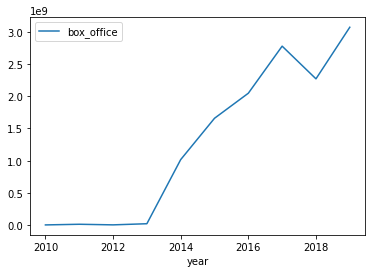

In [68]:
(data.query('box_office.isnull() != True')
 .groupby('year')
 .agg({'box_office':'max'})).plot()
plt.show()

Как мы видим, сумма сборов растёт с 2013 года. До этого она была стабильной. В 2019 году наблюдается максимальный пик, до этого принадлежавший 2017 году.

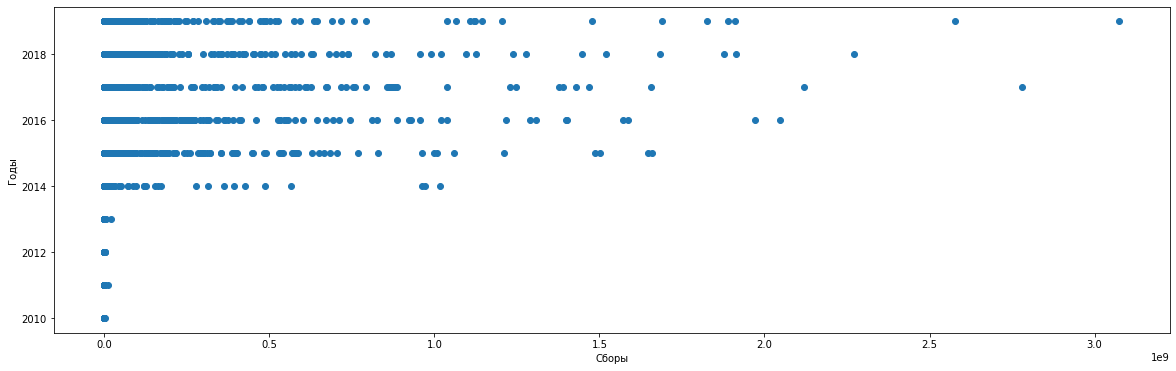

In [69]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(x = data['box_office'], y = data['year'])
plt.xlabel("Сборы")
plt.ylabel("Годы")

plt.show()

Если смотреть на линейный график, то с 2010 года по 2013 год максимальные сборы фильмов держались на одном уровне. К 2014 году наблюдался резкий взлёт к 1 миллиарду рублей. Рост продолжался до 2017 года. В 2018 году в кинематографе дела пошли плохо, следовательно зафиксировано падение кассовых сборов на 200000000 рублей. Однако к 2019 году сборы вновь стали расти и превысили данные за 2017 год.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [70]:
box_office = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
box_office.columns = ['box_mean', "box_median"]
box_office

,box_mean,box_median
year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.93,3522.50
2014,26684415.27,18160.00
2015,84940570.31,4920933.00
2016,91000569.85,3846679.41
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


Показатели среднего и медианы сильно различаются. Дело в большом количестве выбросов, которые были показаны на диаграмме размаха. Смотря на медиану, можно сделать вывод, что в 2017 году среднестатистический фильм, выходившый в прокат собирал больше остальных в прошлых и следующих годах. Показатели среднего значения говорят о том же.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:title={'center':'box_office'}, xlabel='age_restriction'>

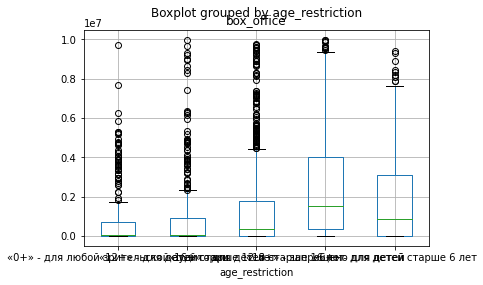

In [71]:
data[data["box_office"] < 10000000].boxplot("box_office", by="age_restriction")

,box_office_sum
age_restriction,
«12+» - для детей старше 12 лет,186521671.35
«6+» - для детей старше 6 лет,164184893.80
«16+» - для детей старше 16 лет,67667386.13
«18+» - запрещено для детей,41153851.27
«0+» - для любой зрительской аудитории,9719348.16


Данные о сборах и возрастном рейтинге за 2015 год.



,box_office_sum
age_restriction,
«6+» - для детей старше 6 лет,172187800.12
«12+» - для детей старше 12 лет,148834713.71
«16+» - для детей старше 16 лет,91563453.53
«18+» - запрещено для детей,44992912.71
«0+» - для любой зрительской аудитории,3664118.26


Данные о сборах и возрастном рейтинге за 2016 год.



,box_office_sum
age_restriction,
«6+» - для детей старше 6 лет,268580936.57
«12+» - для детей старше 12 лет,191498235.63
«16+» - для детей старше 16 лет,154917709.92
«0+» - для любой зрительской аудитории,76532976.67
«18+» - запрещено для детей,65656432.52


Данные о сборах и возрастном рейтинге за 2017 год.



,box_office_sum
age_restriction,
«12+» - для детей старше 12 лет,212944651.65
«6+» - для детей старше 6 лет,148602567.99
«16+» - для детей старше 16 лет,105792322.74
«18+» - запрещено для детей,48939025.15
«0+» - для любой зрительской аудитории,6489800.42


Данные о сборах и возрастном рейтинге за 2018 год.



,box_office_sum
age_restriction,
«6+» - для детей старше 6 лет,158673440.13
«12+» - для детей старше 12 лет,149178809.10
«16+» - для детей старше 16 лет,71648421.26
«18+» - запрещено для детей,55310362.31
«0+» - для любой зрительской аудитории,5915355.61


Данные о сборах и возрастном рейтинге за 2019 год.



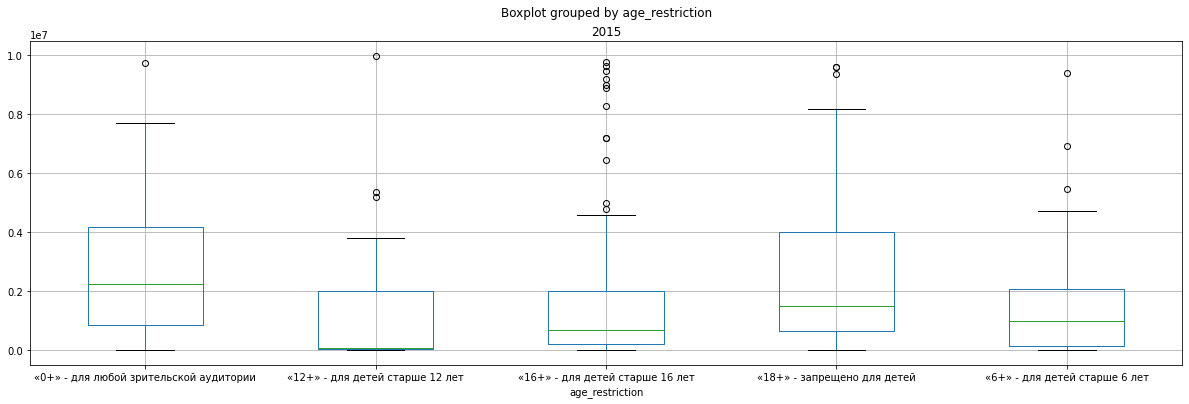

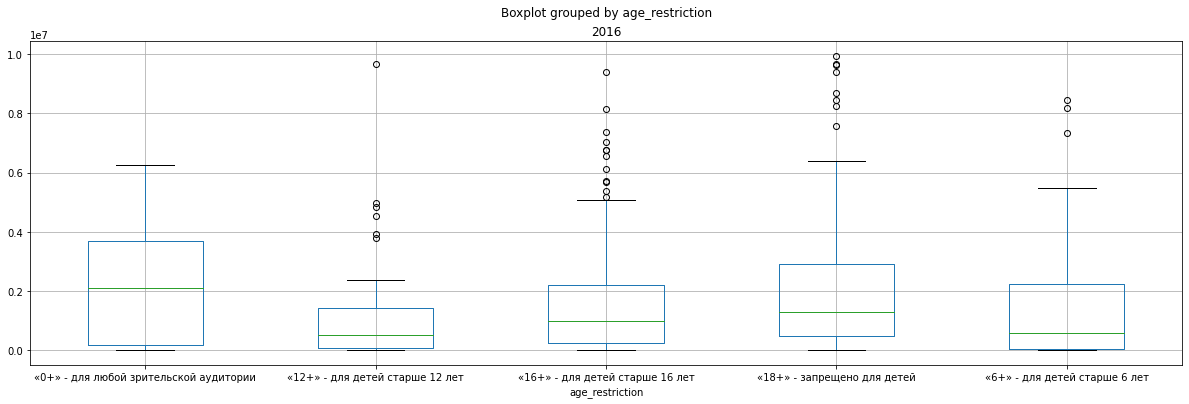

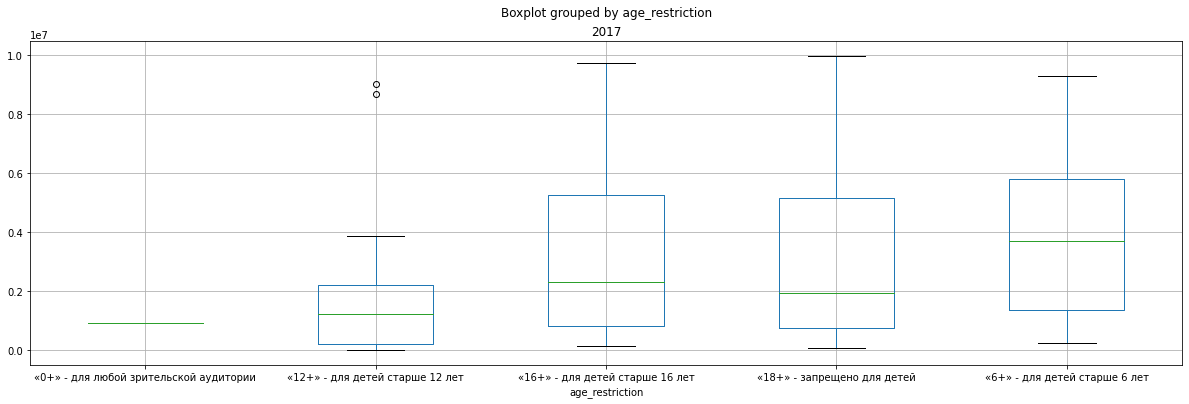

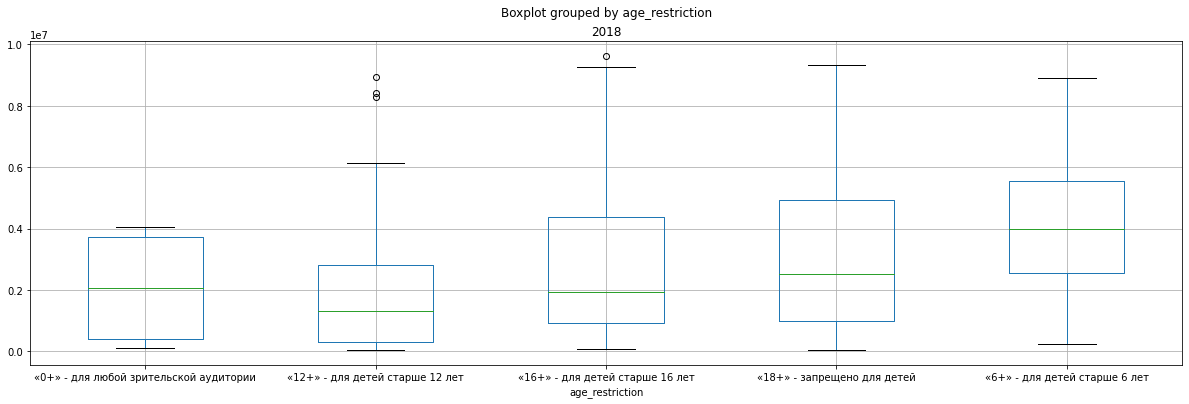

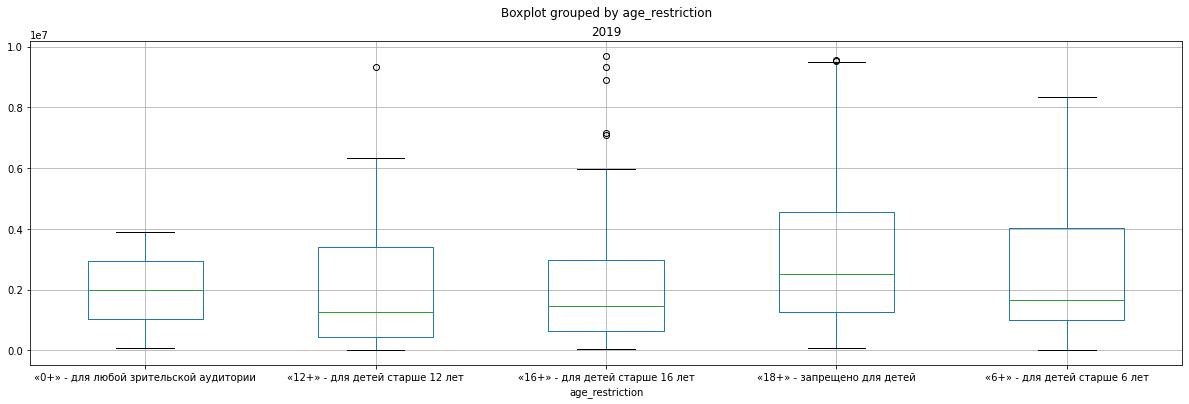

In [72]:
for year_index in range(2015, 2020):
    
    (data[(data["box_office"] < 10000000) & (data['year'] == year_index)]
     .boxplot("box_office", by="age_restriction", figsize=(20,6))
     .set_title(year_index))
    
    box_age_data = (data[data['year'] == year_index]
                    .pivot_table(index='age_restriction', 
                                 values='box_office'))
    
    box_age_data.columns = ['box_office_sum']
    display(box_age_data.sort_values('box_office_sum', ascending=False))
    print(f'Данные о сборах и возрастном рейтинге за {year_index} год.')
    print()

Статистика по годам меняется. В 2016-2018 годах самое большое количество кассовых сборов собрали фильмы с рейтингом 16+. В 2019 году - фильмы для детей старше 6 лет. В 2015 году - фильмы 12+. Примечательно, что во все года меньше всего собирали фильмы 0+. Вероятно это детские сериалы, которые не прокатывались в кинотеатрах.

Смотря на выбросы, можно сказать, что выбросов больше всех в 2016 году. Меньше всех - в 2017 году. Чаще всего от выбросов страдает категория "16+". Самое стабильное распределение - 2019 год (в районе 2 млн. рублей). Самое хаотичное распределение - 2017 год (медиана скачет от 0.1 до 3.9)

#### Промежуточный итог
- Была посчитана статистика выхода картин по годам и отсеяны фильмы без информации о прокате: их было большое количество - после чистки фильмов стало намного меньше.
- Была выявлена динамика фильмов и года с максимальными и минимальными сборами.
- Посчитана медиана и среднее.
- Выявлено, в каком году, для какой категории зрителей фильмы собрали больше.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [73]:
row = data[(data['box_office'] == 0)].index
data = data.drop(index=row)

In [74]:
data.describe()

,puNumber,box_office,refundable_support,nonrefundable_support,budget,ratings,year,gov_support
count,7461.00,3134.00,332.00,332.00,332.00,7462.00,7462.00,332.00
mean,135257502.18,77064365.82,11864457.83,48980988.89,127229716.68,6.50,2014.60,inf
std,38397965.56,241178383.77,24916555.26,59980117.92,188588333.12,1.04,3.01,NaN
min,1811096.00,40.00,0.00,0.00,0.00,1.00,2010.00,0.04
25%,113000117.00,101028.75,0.00,25000000.00,42000000.00,6.00,2012.00,0.38
50%,121015516.00,2409099.35,0.00,30000000.00,68649916.00,6.60,2015.00,0.61
75%,124003319.00,24569794.87,15000000.00,40375000.00,141985319.50,7.10,2017.00,0.66
max,231001111.00,3073568690.79,180000000.00,400000000.00,2305074303.00,9.90,2019.00,inf


#### Кассовые сборы по миллиардам

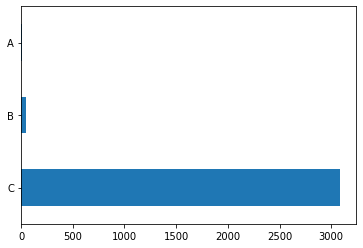

In [75]:
pd.cut(data['box_office'], 3, labels=[
                                'C',
                                'B',
                                'A']).value_counts().plot(kind='barh');

In [76]:
box_office = pd.cut(data['box_office']/1000000, 3)
box_office.value_counts()

(-3.074, 1024.523]      3084
(1024.523, 2049.046]      45
(2049.046, 3073.569]       5
Name: box_office, dtype: int64

Поделим кассовые сборы на три категории:
- A(Сборы от 2 млрд. до 3 млрд.)
- B(Сборы от 1 млрд. до 2 млрд.)
- C(Сборы до млрд.)

Это нужно для того, чтобы разделить фильмы строго по миллиардам: какие собрали меньше миллиарда, какие больше, какие больше 2 млрд. и так далее. В этом плане ориентироваться на квантили не корректно, так как ни один из них не доходит и до 500 млн.

Вывод: больше всего фильмов категории C, далее идёт категория B, в конце - категория A. Результаты ожидаемы - очень мало лент собирают больше миллиарда рублей. 

#### Создание категорий

Внесём новый столбец с категориями. Добавим категорию D (до 500,000,000 рублей)

In [77]:
def set_category(row):
    if row['box_office'] < 500000000:
        return 'D'
    if 500000000 <= row['box_office'] <= 1000000000:
        return 'C'
    if 1000000001 <= row['box_office'] <= 2000000000:
        return 'B'
    if row['box_office'] >= 2000000001:
        return 'A'

In [78]:
data['box_office_category'] = data.apply(set_category, axis=1)

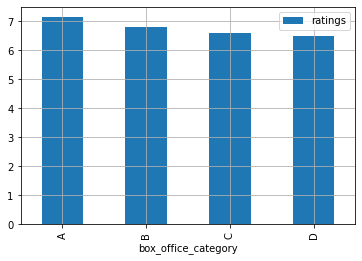

In [79]:
data.pivot_table(index='box_office_category', values='ratings', aggfunc='median').plot(kind='bar', grid=True);

График показывает, что по мере "ухудшения" категории падает и средний рейтинг фильма. Так фильмы категории A имеют средний рейтинг выше 7,1. У категории B - 6,8. Категория C - 6,6. Категория D - 6,5.

#### Рейтинги

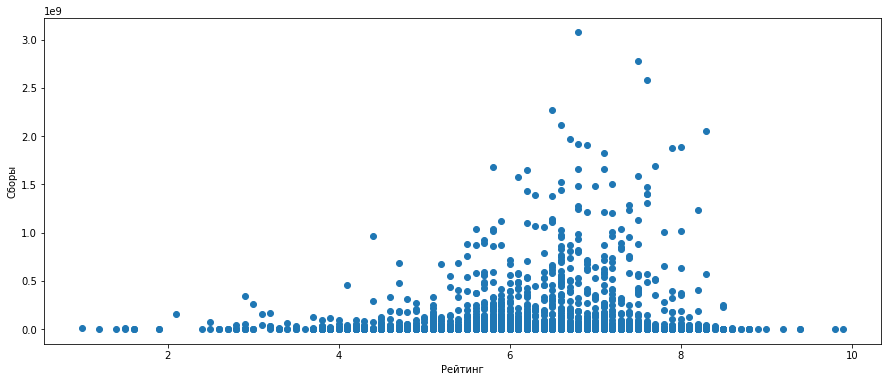

In [80]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = data['ratings'], y = data['box_office'])
plt.xlabel("Рейтинг")
plt.ylabel("Сборы")

plt.show()

In [81]:
(
    data[data['box_office'] > 1000000000]
 .pivot_table(index='title', values=['ratings', 'box_office'], aggfunc='median')
 .sort_values(by='ratings', ascending=False)
 .iloc[[0, -1]]
)

,box_office,ratings
title,,
Зверополис,2048126108.00,8.30
Притяжение (2016),1038321489.00,5.60


Фильмы, собравшие больше миллиарда рублей находятся в рейтинговом диапозоне от 5.6 (Притяжение, Россия) до 8.3 (Зверополис, США) баллов. 

#### Бюджеты и поддержка

Здесь будем иметь дело с долями, следовательно нужны равные части, так что будут применяться уже квантили.

In [82]:
data.describe()

,puNumber,box_office,refundable_support,nonrefundable_support,budget,ratings,year,gov_support
count,7461.00,3134.00,332.00,332.00,332.00,7462.00,7462.00,332.00
mean,135257502.18,77064365.82,11864457.83,48980988.89,127229716.68,6.50,2014.60,inf
std,38397965.56,241178383.77,24916555.26,59980117.92,188588333.12,1.04,3.01,NaN
min,1811096.00,40.00,0.00,0.00,0.00,1.00,2010.00,0.04
25%,113000117.00,101028.75,0.00,25000000.00,42000000.00,6.00,2012.00,0.38
50%,121015516.00,2409099.35,0.00,30000000.00,68649916.00,6.60,2015.00,0.61
75%,124003319.00,24569794.87,15000000.00,40375000.00,141985319.50,7.10,2017.00,0.66
max,231001111.00,3073568690.79,180000000.00,400000000.00,2305074303.00,9.90,2019.00,inf


##### Невозвратные средства

In [83]:
(data[(data['box_office'] < data['box_office'].quantile(0.50))]).count()[0] #общее кол-во фильмов до квантиля

1567

###### Провальные фильмы

In [84]:
fail_box_office_under_mid = (data[(data['budget'] > data['box_office'])
      &(data['box_office'] < data['box_office']
        .quantile(0.50))
     &(data['budget']
       .isnull()== False)]) #провальные фильмы

In [85]:
fail_box_office_under_mid.count()[0] # кол-во провальных фильмов

103

In [86]:
box_office_under_mid = (data[(data['box_office'] 
                              < data['box_office'].quantile(0.50))
                             &(data['budget'].isnull()== False)]) #общее кол-во фильмов до квантиля, бюджет известен

In [87]:
box_office_under_mid.count()[0]# кол-во фильмов до медианы

105

In [88]:
box_office_under_mid_govsup = (data[(data['box_office'] 
                              < data['box_office'].quantile(0.50))
                             &(data['nonrefundable_support'].isnull()== False)]) #общее кол-во фильмов до квантиля, поддержка известна

In [89]:
box_office_under_mid_govsup.count()[0]

105

In [90]:
(fail_box_office_under_mid.count() 
 / box_office_under_mid.count())[0]

0.9809523809523809

Как видно из таблицы с описательной статисткой, 50% фильмов не получали средства на возвратной основе. Найдем общее их количество и количество фильмов, провалившихся в прокате и выясним долю провала. Доля провала высокая - почти 100%.

###### Успешные фильмы

In [91]:
success_box_office_under_mid = (data[(data['budget'] * 2 < data['box_office'])
      &(data['box_office'] < data['box_office']
        .quantile(0.50))
     &(data['budget']
       .isnull()== False)]) # прибыльные фильмы

In [92]:
success_box_office_under_mid.count()[0] # кол-во прибыльных фильмов

2

In [93]:
(success_box_office_under_mid.count() 
 / box_office_under_mid.count())[0]

0.01904761904761905

Доля успешных фильмов до медианы - почти 2 процента.

In [94]:
print('Доля невозвратных средств - ', box_office_under_mid['nonrefundable_support'].sum() / box_office_under_mid['budget'].sum())
print(f'Доля возвратных средств - ', box_office_under_mid['refundable_support'].sum() / box_office_under_mid['budget'].sum())

Доля невозвратных средств -  0.5540857796553397
Доля возвратных средств -  0.022512945769148727


 Доля невозвратных средств составляет больше 55% от общего бюджета.
<br>Доля возвратных средств составляет чуть больше 2% от общего бюджета.

Доля провальных фильмов критически высокая. И больше половины средств гос.поддержки невозвратные. В то же время возвратных - всего 2%.

In [95]:
data['main_studio'] = data['film_studio'].apply(director_year) #добавим ещё столбец с главной студией

##### Возвратные средства

In [96]:
(data[(data['box_office'] > data['box_office'].quantile(0.50))]).count()[0] #общее кол-во фильмов до квантиля

1567

###### Провальные фильмы

In [97]:
box_office_upper_mid = (data[(data['box_office'] 
                              > data['box_office'].quantile(0.50))
                             &(data['budget'].isnull()== False)]) # фильмы с господдержкой на возвратной основе

In [98]:
box_office_upper_mid.count()[0]

213

In [99]:
box_office_upper_mid_govsup = (data[(data['box_office'] 
                              > data['box_office'].quantile(0.50))
                             &(data['refundable_support'].isnull()== False)]) #общее кол-во фильмов после квантиля, поддержка известна

In [100]:
box_office_upper_mid_govsup.count()[0]

213

In [101]:
fail_box_office_upper_mid = (data[(data['budget'] > data['box_office'])
      &(data['box_office'] > data['box_office']
        .quantile(0.50))
     &(data['budget']
       .isnull()== False)]) #провальные фильмы

In [102]:
fail_box_office_upper_mid.count()[0]

132

In [103]:
(fail_box_office_upper_mid.count() / box_office_upper_mid.count())[0]

0.6197183098591549

Доля провальных фильмов в районе третего квантиля ниже чем в районе первого, но такая же высокая - 62%.

###### Успешные фильмы

In [104]:
success_box_office_upper_mid = (data[(data['budget'] * 2 < data['box_office'])
      &(data['box_office'] > data['box_office']
        .quantile(0.50))
     &(data['budget']
       .isnull()== False)]) #успешные фильмы

In [105]:
success_box_office_upper_mid.count()[0] # кол-во фильмов после медианы

47

In [106]:
(success_box_office_upper_mid.count() / box_office_upper_mid.count())[0]

0.22065727699530516

Доля успешных фильмов - 22%. Это намного выше, чем у фильмов до медианы, но это нельзя назвать успешной статитсикой.

In [107]:
print('Доля невозвратных средств - ', box_office_upper_mid['nonrefundable_support'].sum() / box_office_upper_mid['budget'].sum())
print(f'Доля возвратных средств - ', box_office_upper_mid['refundable_support'].sum() / box_office_upper_mid['budget'].sum())

Доля невозвратных средств -  0.3534359870745427
Доля возвратных средств -  0.10550145224709194


Доля невозвратных средств составляет 35% от общего бюджета.
Доля возвратных средств составляет 10% от общего бюджета.

Здесь результаты чуть лучше, чем у предыдущей категории фильмов, но 62 процента провальных фильмов - это всё также много. И здесь доля средств на возвратной основе уже больше, а на невозвратной меньше. Можно провести параллель - чем успенее фильм, тем больше денег должны вернуть создатели.

Найдем также количество прибыльных фильмов - их сборы должны минимум в два раза превышать бюджет, так как мы учитываем ещё и издержки (деньги со сборов идут на процент кинотеатрам, дистрибьюторам и другим). 

In [108]:
stonks = data[(data['budget'] != 0) & (data['box_office'] > data['budget']*2)]

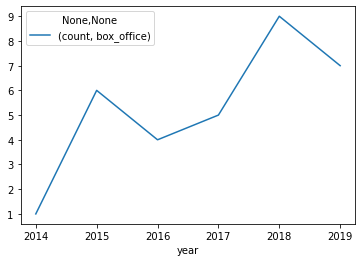

In [109]:
stonks.pivot_table(index='year', values='box_office', aggfunc=['count']).plot();

Количество прибыльных фильмов за 5 лет выросло на 6 кинолент. В промежутке от 2017 до 2018 года наблюдался пик в 9 фильмов, а в срезах 2015-2016 год и 2018-2019 год - спад прибыльных кинолент.

##### Один рубль

In [110]:
data['one_ruble_support'] = data['box_office'] / (data['nonrefundable_support'] + data['refundable_support'])

In [111]:
data.pivot_table(index='title', values='one_ruble_support').sort_values(by='one_ruble_support', ascending=False).head(15)

,one_ruble_support
title,
Холоп,51.23
За гранью реальности,21.12
Я худею,21.12
Иван Царевич и Серый Волк 3,17.62
Лёд,17.01
Последний богатырь,16.55
Три богатыря и принцесса Египта,15.18
Битва за Севастополь,14.61
8 новых свиданий,13.11


Посмотрим также на осколько окупился один рубль возвратных и невозвратных средств поддержки. Поскольку сумма полной поддержки отличается от бюджета, а местами бюджет и вовсе равен нулю, то возьмём сумму поддержек. "Самый дорогой рубль" принадлежит "Холопу" - 1 рубль поддержки вернулся 51 рублем сборов. Фильмы "За гранью реальности" и "Я худею" делят второе место - 21.12 рубль. На третьем месте - "Иван Царевич и Серый Волк 3" - 17.62 рубля сборов за один рубль поддержки. Примечательно, что в первой десятке фильмы российского производства.

In [112]:
for column in data.columns:              
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip() # почистим ещё раз от отступов, ведь появились новые столбцы.

In [113]:
foreign_country = data[(data['main_country'] != 'Россия') & (data['main_country'] != 'СССР') & (data['gov_support'].notna())]

In [114]:
foreign_country['film_studio'].unique().tolist()

[]

Мы получили список зарубежных студий, которым ушла часть сборов с проката в России

#### Режиссёры и студии

In [115]:
director_stonk = stonks.pivot_table(index='main_director', values=['box_office'], aggfunc=['count'])

print(f'Всего режиссёров - {len(director_stonk)}', end='\n\n')

director_stonk.columns = ['box_office']
for director, movie in director_stonk.itertuples():
    print(f'{director}, снял прибыльных фильмов: {movie}')
    print('Всего снял фильмов - ', data[data['main_director'] == director]['puNumber'].count(), end='\n\n')

Всего режиссёров - 28

А.Войтинский, снял прибыльных фильмов: 1
Всего снял фильмов -  4

А.Волгин, снял прибыльных фильмов: 1
Всего снял фильмов -  3

А.Мегердичев, снял прибыльных фильмов: 1
Всего снял фильмов -  3

А.Пармас, снял прибыльных фильмов: 1
Всего снял фильмов -  2

А.Першин (псевдоним Ж.Крыжовников), снял прибыльных фильмов: 1
Всего снял фильмов -  1

А.Сидоров, снял прибыльных фильмов: 1
Всего снял фильмов -  3

А.Федотов, снял прибыльных фильмов: 1
Всего снял фильмов -  1

А.Черномазов (псевдоним Алексей Нужный), снял прибыльных фильмов: 1
Всего снял фильмов -  2

Д.Дьяченко, снял прибыльных фильмов: 2
Всего снял фильмов -  8

Д.Киселев, снял прибыльных фильмов: 1
Всего снял фильмов -  5

Д.Козловский, снял прибыльных фильмов: 1
Всего снял фильмов -  1

Д.Шмидт, снял прибыльных фильмов: 2
Всего снял фильмов -  3

К.Бронзит, снял прибыльных фильмов: 1
Всего снял фильмов -  3

К.Дружинин, снял прибыльных фильмов: 1
Всего снял фильмов -  2

К.Феоктистов, снял прибыльных фил

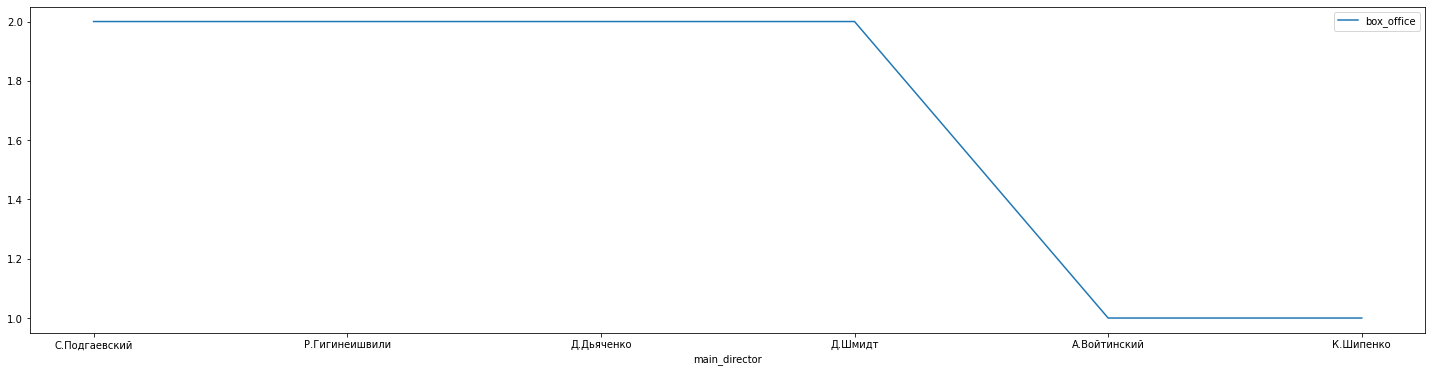

In [116]:
(director_stonk
 .sort_values(by='box_office', ascending=False)
.head(6)
.plot(figsize=(25,6)));

Всего 28 режиссёров сняли прибыльные фильмы. Среди них выделяются Д.Дьяченко, Д.Шмидт, Р.Гигинеишвили и С.Подгаевский, которые сняли по два успешных фильма. Остальные сняли по одному.

In [117]:
studio_stonk = stonks.pivot_table(index='main_studio', values=['box_office'], aggfunc=['count'])

print(f'Всего студий - {len(studio_stonk)}', end='\n\n')

studio_stonk.columns = ['box_office']
for studio, movie in studio_stonk.itertuples():
    print(f'{studio}, сняла прибыльных фильмов: {movie}')
    print('Всего сняла фильмов - ', data[data['main_studio'] == studio]['puNumber'].count(), end='\n\n')

Всего студий - 24

Индивидуальный Предприниматель Шальопа А.Г., сняла прибыльных фильмов: 1
Всего сняла фильмов -  1

ООО "Вайс Филмс", сняла прибыльных фильмов: 1
Всего сняла фильмов -  2

ООО "Водород 2011", сняла прибыльных фильмов: 2
Всего сняла фильмов -  5

ООО "ДК интертеймент", сняла прибыльных фильмов: 1
Всего сняла фильмов -  1

ООО "Друг Друга", сняла прибыльных фильмов: 2
Всего сняла фильмов -  2

ООО "КЕДР ПРО", сняла прибыльных фильмов: 1
Всего сняла фильмов -  2

ООО "Кинокомпания "Небо", сняла прибыльных фильмов: 1
Всего сняла фильмов -  3

ООО "Кинокомпания "Небо" по заказу АО "ВБД Груп", сняла прибыльных фильмов: 1
Всего сняла фильмов -  1

ООО "Кинокомпания "Новые люди", сняла прибыльных фильмов: 1
Всего сняла фильмов -  5

ООО "Кинокомпания Блесс, сняла прибыльных фильмов: 1
Всего сняла фильмов -  1

ООО "Кинокомпания Большое кино", сняла прибыльных фильмов: 1
Всего сняла фильмов -  1

ООО "Кинокомпания МАРС, сняла прибыльных фильмов: 1
Всего сняла фильмов -  6

ООО

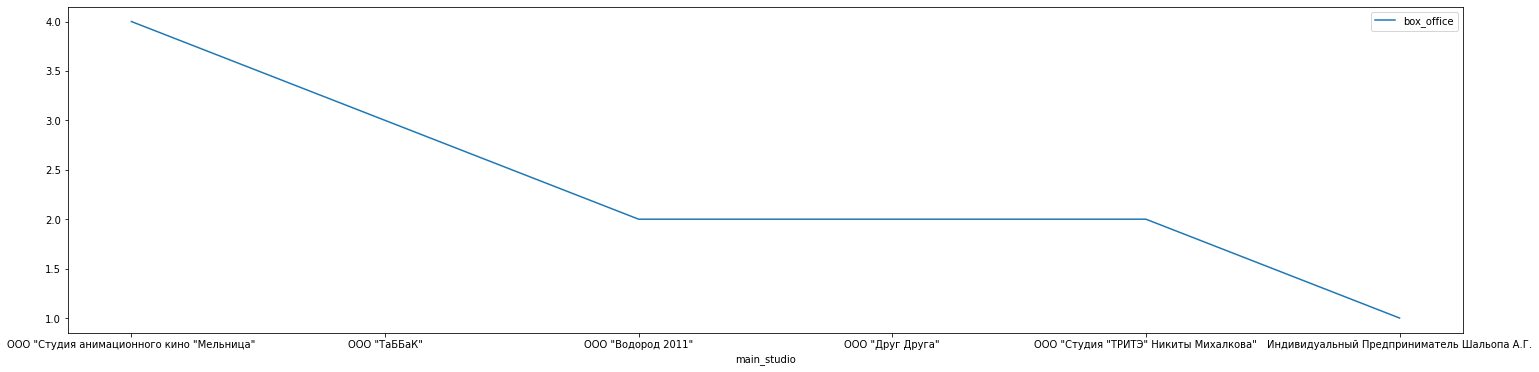

In [118]:
(studio_stonk
 .sort_values(by='box_office', ascending=False)
.head(6)
.plot(figsize=(25,6)));

Студии, снявшие прибыльные фильмы демонстрируют немного больше разнообразия. Лидирует "Мельница", выпустившая 4 прибыльных фильма. Далее студия "ТаББак" - 3 успешных ленты. "Водород 2011", "Друг Друга" и "Студия ТРИТЭ Никиты Михалкова" - 2 ленты. Первые две ленты выигрываю за счёт того, что сняли много картин ("Мельница" - 34, "ТаББак" - 25) Так что достижение сомнительное.

In [119]:
fail = data[(data['budget'] != 0) & (data['box_office'] < data['budget'])]

In [120]:
director_fail = fail.pivot_table(index='main_director', values=['box_office'], aggfunc=['count'])

print(f'Всего режиссёров - {len(director_fail)}', end='\n\n')

director_fail.columns = ['box_office']
for director, movie in director_fail.itertuples():
    print(f'{director}, снял провальных фильмов: {movie}')
    print('Всего снял фильмов - ', data[data['main_director'] == director]['puNumber'].count(), end='\n\n')

Всего режиссёров - 209

А Андрющенко, снял провальных фильмов: 1
Всего снял фильмов -  1

А.Аббасов, снял провальных фильмов: 1
Всего снял фильмов -  2

А.Аксененко, снял провальных фильмов: 2
Всего снял фильмов -  8

А.Амиров, снял провальных фильмов: 1
Всего снял фильмов -  1

А.Аравин, снял провальных фильмов: 1
Всего снял фильмов -  2

А.Атанесян, снял провальных фильмов: 1
Всего снял фильмов -  4

А.Баршак, снял провальных фильмов: 1
Всего снял фильмов -  5

А.Богатырев, снял провальных фильмов: 1
Всего снял фильмов -  3

А.Богуславский, снял провальных фильмов: 2
Всего снял фильмов -  3

А.Велединский, снял провальных фильмов: 1
Всего снял фильмов -  2

А.Войтинский, снял провальных фильмов: 1
Всего снял фильмов -  4

А.Волгин, снял провальных фильмов: 1
Всего снял фильмов -  3

А.Галибин, снял провальных фильмов: 1
Всего снял фильмов -  2

А.Герман, снял провальных фильмов: 1
Всего снял фильмов -  2

А.Горчилин, снял провальных фильмов: 1
Всего снял фильмов -  1

А.Звягинцев, сн

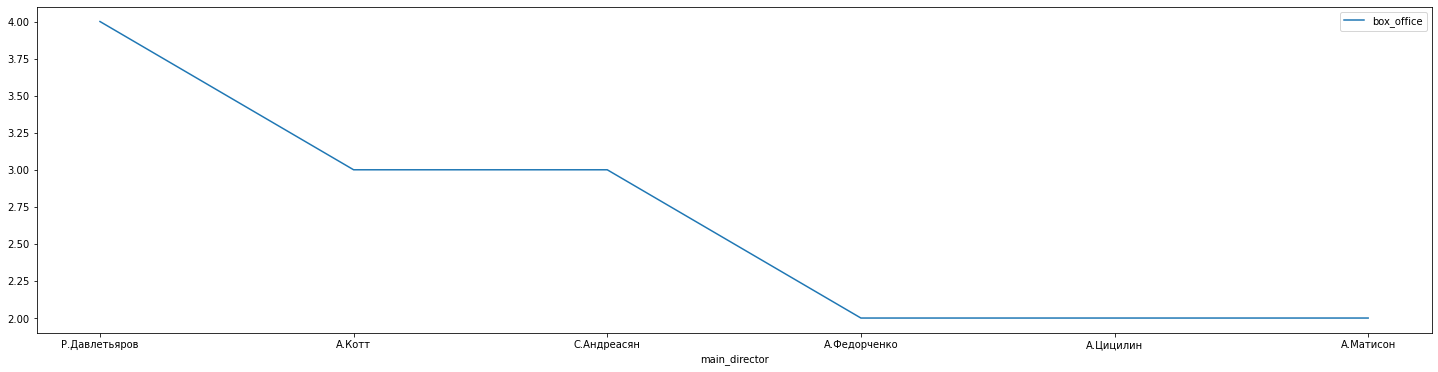

In [121]:
(director_fail
 .sort_values(by='box_office', ascending=False)
.head(6)
.plot(figsize=(25,6)));

Режиссёров, снявших провалы, гораздо больше, чем успешных - 209 человек. Р.Давлетьяров снял 4 провальные киноленты - самое большое количество. А.Котт и С.Андреасян - 3 фильма.

In [122]:
studio_fail = fail.pivot_table(index='main_studio', values=['box_office'], aggfunc=['count'])

print(f'Всего студий - {len(studio_fail)}', end='\n\n')

studio_fail.columns = ['box_office']
for studio, movie in studio_fail.itertuples():
    print(f'{studio}, сняла провальных фильмов: {movie}')
    print('Всего сняла фильмов - ', data[data['main_studio'] == studio]['puNumber'].count(), end='\n\n')

Всего студий - 170

АНО "Интерфест", сняла провальных фильмов: 1
Всего сняла фильмов -  1

АНО "КиноДело продакшн", сняла провальных фильмов: 1
Всего сняла фильмов -  1

АНО "Творческая студия "Стелла", сняла провальных фильмов: 1
Всего сняла фильмов -  3

АНО содействия развитию кинематографии "Ангел, сняла провальных фильмов: 1
Всего сняла фильмов -  1

АО "ТПО "Киностудия им.М.Горького", сняла провальных фильмов: 2
Всего сняла фильмов -  4

Автономная некоммерческая организация "Творческая студия "Стелла", сняла провальных фильмов: 1
Всего сняла фильмов -  1

ЗАО "Дирекция кино", сняла провальных фильмов: 1
Всего сняла фильмов -  1

ЗАО "МЕДИА, сняла провальных фильмов: 1
Всего сняла фильмов -  2

ЗАО "Мотор фильм студия", сняла провальных фильмов: 2
Всего сняла фильмов -  2

ЗАО "ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО", сняла провальных фильмов: 1
Всего сняла фильмов -  1

ЗАО "Студия "Ф.А.Ф.", сняла провальных фильмов: 1
Всего сняла фильмов -  2

Компания Production Value Worl

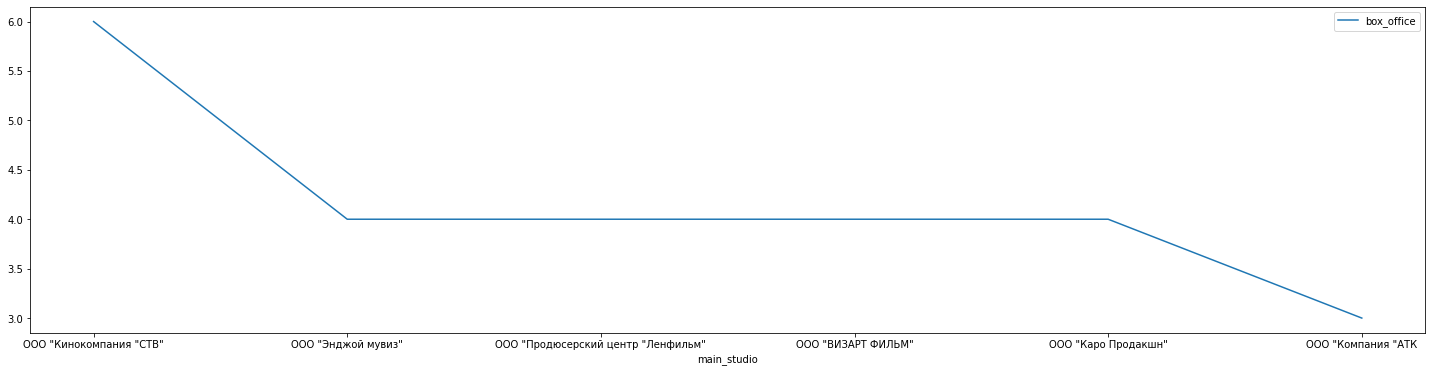

In [123]:
(studio_fail
 .sort_values(by='box_office', ascending=False)
.head(6)
.plot(figsize=(25,6)));

График показывает, что "СТВ" является лидером по провальным фильмам - 6 фильмов. Далее идут "Ленфильм", "ВИЗАРТ Фильм", "КАРО" и "Энджой мувиз".

#### Страна

In [124]:
(data[
    (data['box_office'] > data['budget']) 
      & (data['budget'] > 0)
]
 .pivot_table(
     index='main_country', 
              values='box_office', 
              aggfunc='count')
)

,box_office
main_country,
Россия,66


In [125]:
data[(data['main_country'] == 'США') & (data['budget'] > 0)]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support


In [126]:
data[(data['main_country'] == 'Южная Корея') & (data['budget'] > 0)]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support


Таблица показала, что фильмы, чьи сборы превысили бюджет, снимали в России. Однако, бюджет остальных стран неизвестен, так что не удается отследить статистику стран.

#### "Премии"

In [127]:
data[data['box_office'] == data['box_office'].max()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support
736,111021719.00,3073568690.79,Холоп,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,...,6.80,комедия,2019,К.Шипенко,комедия,Россия,0.38,A,"ООО ""МЕМ",51.23


In [128]:
data[data['production_country'] != 'СССР']['box_office'].min()
data[data['box_office'] == 75]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support
1237,121006410.00,75.00,22 пули: Бессмертный,2010-04-01 12:00:00+00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,...,7.10,"боевик,драма,криминал",2010,Ришар Бери,боевик,Франция,NaN,D,Еуроп Корпорейшн,NaN


Вероятно это ошибка. Не может фильм собрать 75 рублей в прокате. Это даже меньше среднестатической цены на билет в кино.

In [129]:
data[data['ratings'] == data['ratings'].max()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support
52,111001014.00,4295.00,Спираль.,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,...,9.90,"аниме,мультфильм,ужасы",2014,А.Волгин,аниме,Россия,NaN,D,"ООО ""Компания Питон""",NaN
3365,221030715.00,NaN,Прошлое,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,...,9.90,"ужасы,триллер,драма",2015,Эктор Бабенко,ужасы,Аргентина,NaN,None,20 Сенчюри Фокс де Архентина,NaN
4217,111008913.00,NaN,Сказка о добре и Вре,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,...,9.90,"триллер,драма,детектив",2013,Е.Шиляева,триллер,Россия,NaN,None,"НП ""Студия игрового кино ""Лик""",NaN
7241,112003719.00,NaN,Животные рядом со Святыми,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,...,9.90,"криминал,драма",2019,Т.Мирошник,криминал,Россия,NaN,None,"ООО ""Кинопрограмма ""XXI век""",NaN


In [130]:
data[data['ratings'] == data['ratings'].min()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support
645,111016616.00,7323648.00,Взломать блогеров,2016-10-28 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,...,1.00,"комедия,мультфильм,фантастика",2016,М.Свешников,комедия,Россия,0.69,D,"ООО ""ТаББаК""",0.29


In [131]:
data[data['budget'] == data['budget'].max()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support
563,111012819.00,333597059.59,Тайна Печати Дракона,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,...,5.80,"приключения,фэнтези",2019,О.Степченко,приключения,Россия,0.12,D,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",1.24


In [132]:
data[data['budget'] != 0]['budget'].min()

14462464.0

In [133]:
data[data['budget'] == 14462464.0]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,year,main_director,main_genre,main_country,gov_support,box_office_category,main_studio,one_ruble_support
711,111019615.00,801370.00,Я умею вязать,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,...,9.00,драма,2015,Н.Степанова при участии С.Иванова,драма,Россия,0.32,D,"ООО ""Белое Зеркало""",0.17


Мы получили следующие результы:
- Самый кассовый фильм  - "Холоп". Он впринципе самый кассовый российский фильм всех времён.
- Самый провальный фильм - 22 пули: Бессмертный, но очень маленькая сумма - это скорее всего ошибка. 
- Фильмы с высоким баллом - "Спираль", "Прошлое", "Сказка о добре и Вре", "Животные рядом со Святыми" 
- Фильмы с самым низким рейтингом - "Взломать блоггеров" 
- Фильм с самым большим бюджетом - "Тайна Печати Дракона", не окупился. Провал очень большой 
- Фильм с самым низким бюджетом - "Я умею вязать"

### Шаг 5. Напишите общий вывод

Было проделано много работы. Местами возникали сложности, но со всем удалось справиться. 

Подведём итоги:<br>
<br>Ещё раз кратко про 1-3 разделы:
- Были выявлены дупликаты, пропуски, проблемы и несостыковки в данных, заменены типы и вставлены значения в пропуски там, где это было возможно.
- Добавлены новые столбцы для дальнейшего анализа.
- Посчитана динамика сборов, количество фильмов, выходивших в каждом году. Также доля государственной поддержки.
- Какая возрастная категория в каком году была прибыльной, а какая нет.<br>

Итоги по 4-му разделу:
- Для начала мы создали категории, чтобы разделить фильмы и выяснить, какие фильмы собирали больше миллиарда, какие - меньше. Выяснили их рейтинг и количество фильмов каждой категории. Категории: A(Сборы от 2 млрд. до 3 млрд.), B(Сборы от 1 млрд. до 2 млрд.), C(Сборы до млрд.), D(Сборы до 500 млн.).
- Выяснили, в каком рейтинговом диапозоне находятся фильмы, собравшие больше миллиарда и вывели диаграмму разброса, чтобы установить, сколько баллов набирали большинство фильмов. Результаты: от 5.5 до 8.
- Посчитали провальные успешные фильмы до и после 50% квантиля, так как фильмы до него не имели поддержки на возвратной основе, а после него - имели. В первом случае доля провальных фильмов приблизилась к 100%, во втором - 62% - это меньше, чем  первом варианте, но все равно много.
- Посчитали количество действительно прибыльных фильмов, то есть фильмов, чьи сборы в два раза превысили бюджет: их оказалось не так много. Пик пришёлся на 2018 год, к настоящему времени количество прибыльных фильмов упало.
- Выяснили на сколько рублей окупился 1 рубль фильма: нашли самые прибыльные фильмы по этому критерию. Самым прибыльным оказался "Холоп". 
- Получили список режиссёров и студий, которые сняли быольше провальных и успешных фильмов. Также было выведено общее количество фильмов, снятых ими. Кто-то снял 6 провальных фильмов из 35 (однако среди них нет прибыльных, то есть либо в ноль, либо провал), а кто-то один успешный из двух, но вероятность, что снимет плохой фильм тоже есть.
- Самую успешную страну определить не удалось - у остальных стран неизвестен бюджет. Так что мы просто нашли количество фильмов, снятых в России, чьи сборы превышают бюджет.
- И напоследок вывели самый кассовый фильм ("Холоп"), антикассовый фильм (22 пули: Бессмертный, но очень маленькая сумма - это подозрительно), фильмы с высоким баллом ("Спираль", "Прошлое", "Сказка о добре и Вре", "Животные рядом со Святыми") и фильмы с самым низким рейтингом ("Взломать блоггеров"). И фильм с самым большим бюджетом ("Тайна Печати Дракона", не окупился) и фильм с самым низким бюджетом ("Я умею вязать").